In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [4]:
boston=load_boston()

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
#Prepare the dataframe 

In [11]:
dataset=pd.DataFrame(boston.data,columns=boston.feature_names)

In [14]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
dataset['Price']=boston.target

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [18]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [16]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [19]:
#EDA

In [20]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


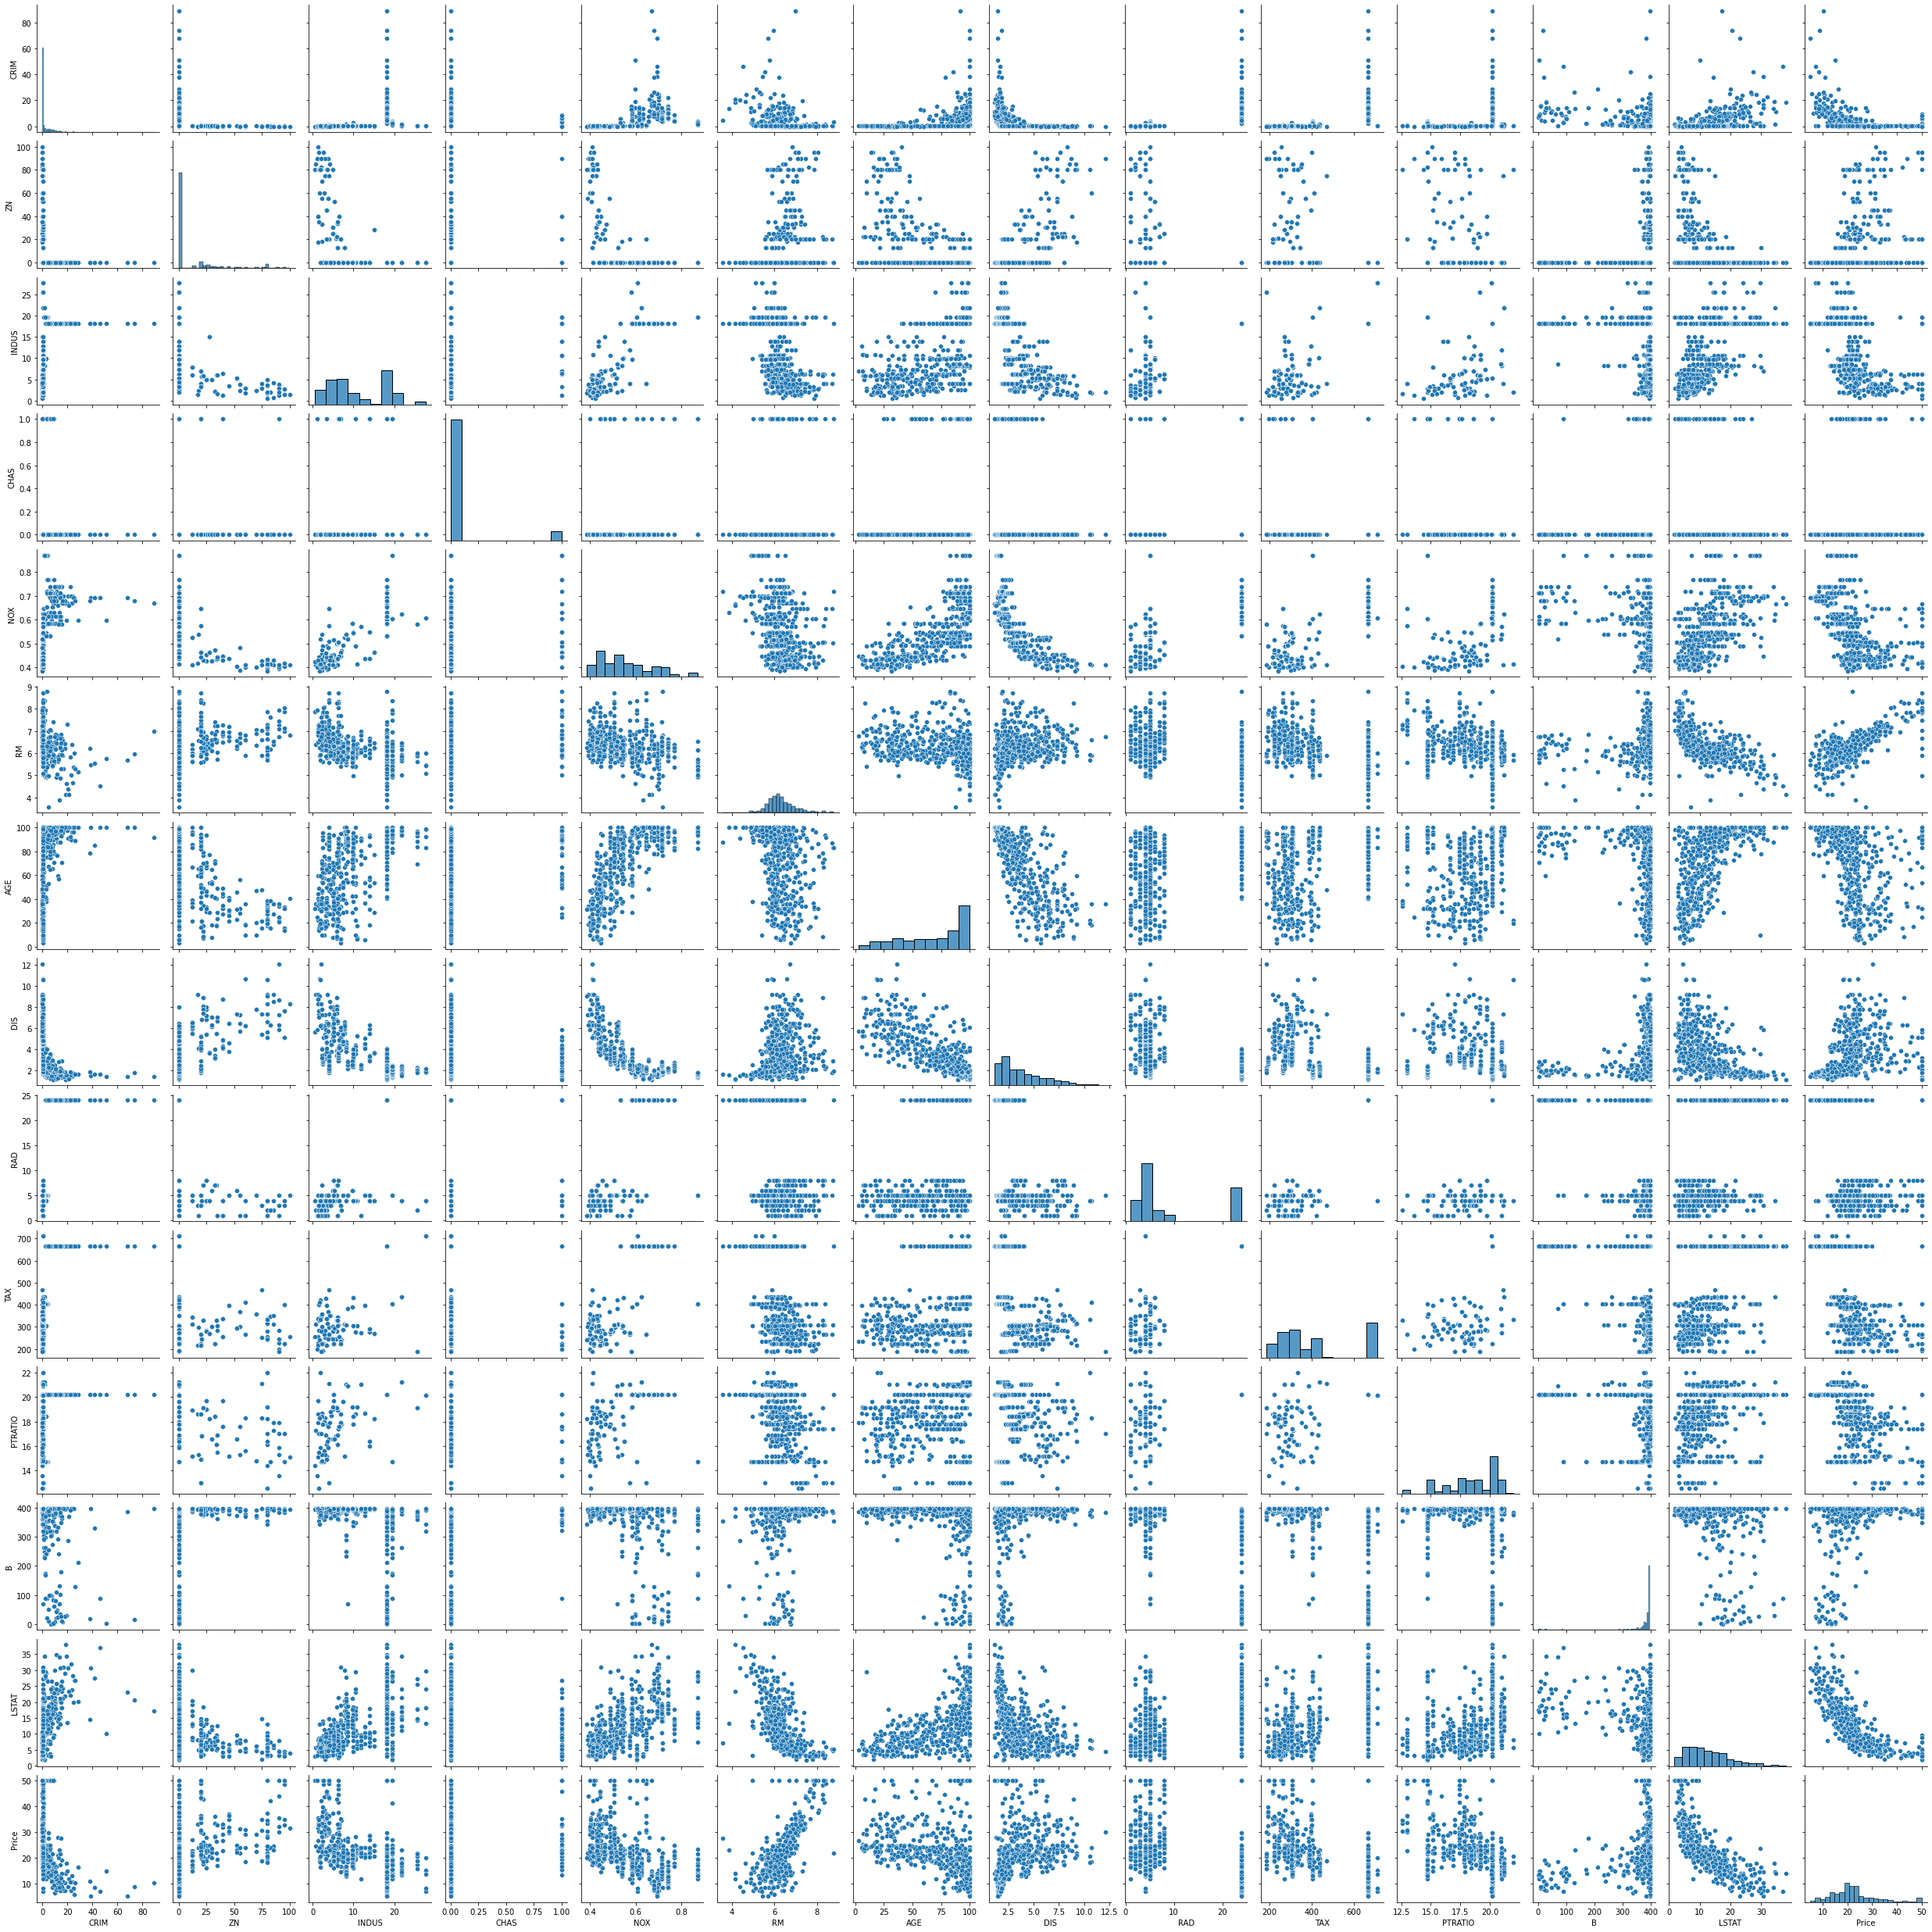

In [21]:
sns.pairplot(dataset)

<AxesSubplot:>

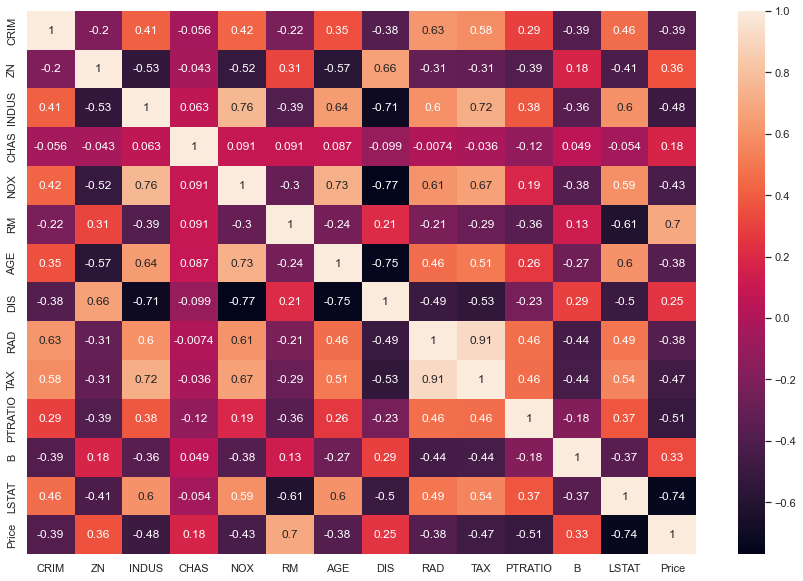

In [24]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(dataset.corr(), annot=True)

Text(0, 0.5, 'Price')

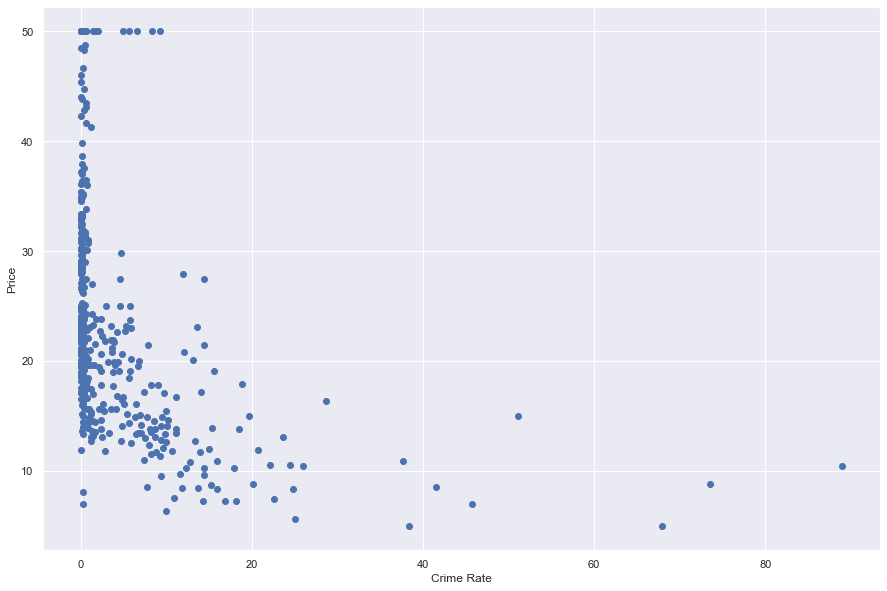

In [25]:
plt.scatter(dataset['CRIM'], dataset['Price'])
plt.xlabel('Crime Rate')
plt.ylabel('Price')

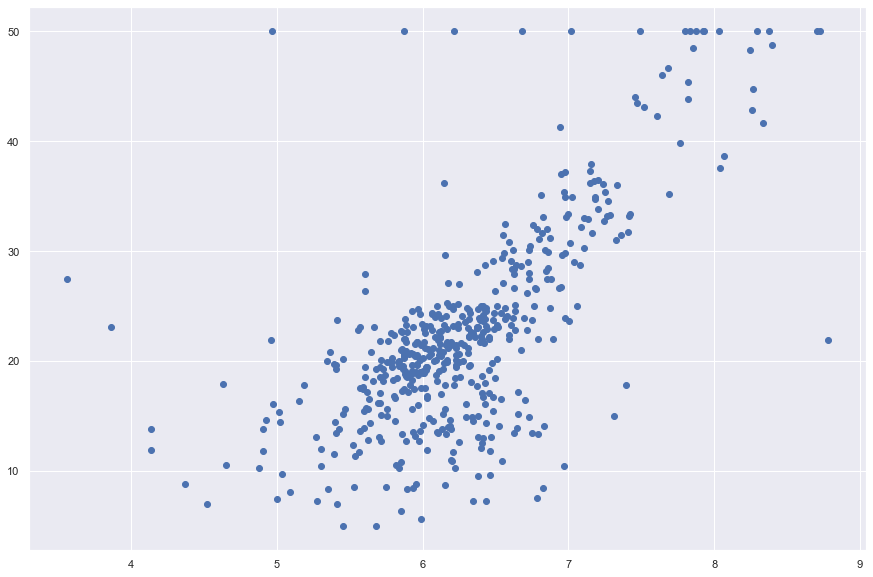

In [26]:
plt.scatter(dataset['RM'], dataset['Price'])

<AxesSubplot:xlabel='RM', ylabel='Price'>

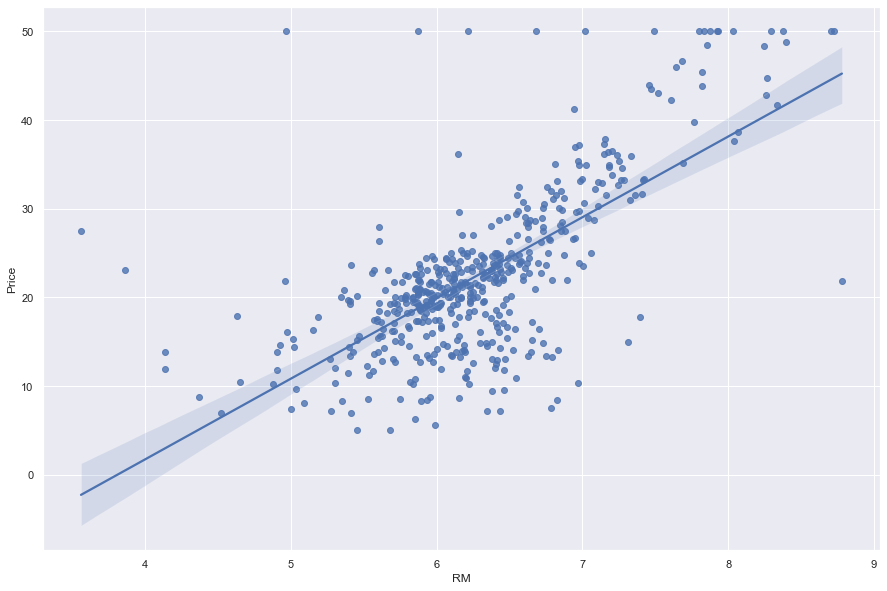

In [27]:
sns.regplot(x='RM',y='Price',data=dataset)

<AxesSubplot:xlabel='LSTAT', ylabel='Price'>

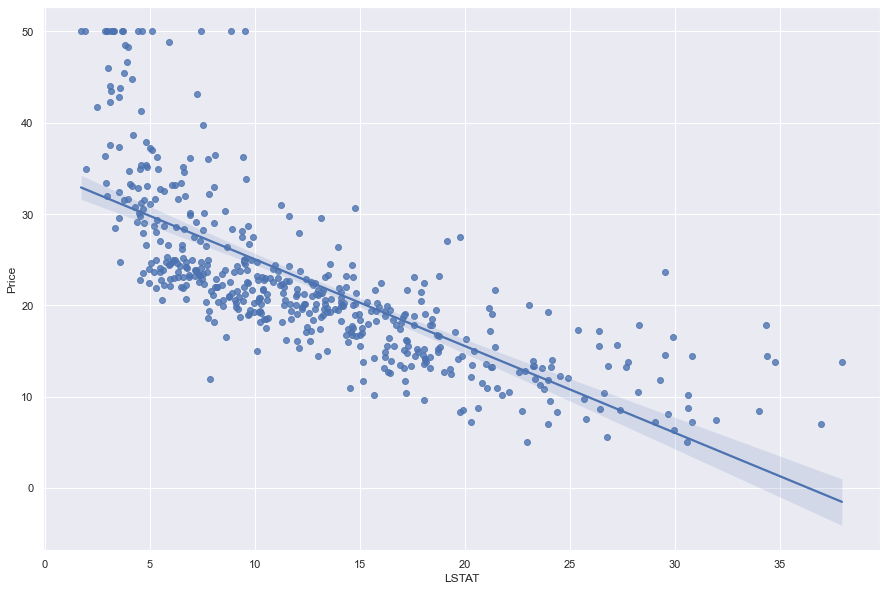

In [28]:
sns.regplot(x='LSTAT',y='Price',data=dataset)

/Users/suhasinikuchi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

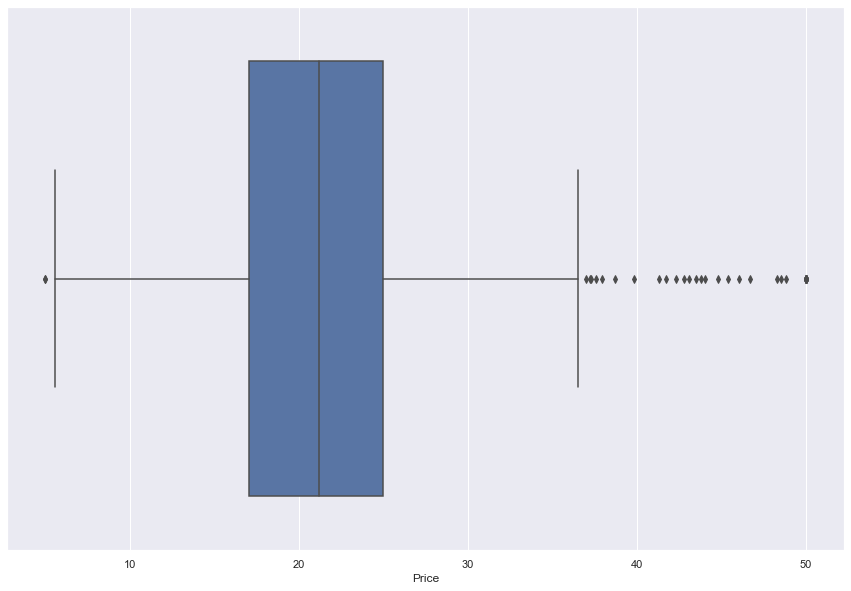

In [29]:
sns.boxplot(dataset['Price'])

/Users/suhasinikuchi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CRIM'>

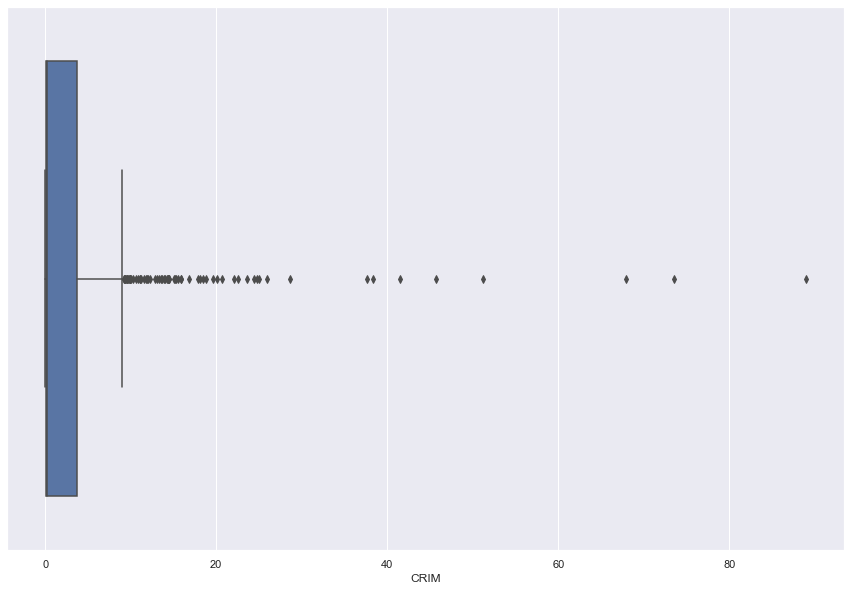

In [30]:
sns.boxplot(dataset['CRIM'])

In [31]:
##Independent And Dependent Features

In [33]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.33, random_state=10)

In [38]:
#standardize or Feature scaling. FE bring feature on the same scale.

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [40]:
X_train=scaler.fit_transform(X_train)

In [41]:
X_test=scaler.transform(X_test) 

In [42]:
# to avoid data leakage we are not standardizing test data

In [43]:
#Model Training

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
regression=LinearRegression()

In [47]:
regression.fit(X_train,y_train)

LinearRegression()

In [48]:
## print the coefficients and the intercept
print(regression.coef_)

[-1.29099218  1.60949999 -0.14031574  0.37201867 -1.76205329  2.22752218
  0.32268871 -3.31184248  2.70288107 -2.09005699 -1.7609799   1.25191514
 -3.83392028]


In [49]:
print(regression.intercept_)

22.077286135693214


In [50]:
## Prediction for test data
reg_pred=regression.predict(X_test)

In [51]:
reg_pred

array([31.43849583, 31.98794389, 30.99895559, 22.31396689, 18.89492791,
       16.21371128, 35.9881236 , 14.81264582, 25.04500847, 37.12806894,
       21.49110158, 30.88757187, 28.05752881, 34.05600093, 33.75791114,
       40.63880011, 24.24023412, 23.41351375, 25.54158122, 21.34135664,
       32.71699711, 17.88341061, 25.49549436, 25.01006418, 32.54102925,
       20.48979076, 19.48816948, 16.92733183, 38.38530857,  0.36265208,
       32.42715816, 32.15306983, 26.10323665, 23.79611814, 20.67497128,
       19.69393973,  3.50784614, 35.26259797, 27.04725425, 27.66164435,
       34.35132103, 29.83057837, 18.40939436, 31.56953795, 17.91877807,
       28.50042742, 19.49382421, 21.69553078, 38.0954563 , 16.44490081,
       24.58507284, 19.67889486, 24.53954813, 34.30610423, 26.74699088,
       34.87803562, 21.06219662, 19.87980936, 18.68725139, 24.71786624,
       19.96344041, 23.56002479, 39.57630226, 42.81994338, 30.37060855,
       17.03737245, 23.83719412,  3.2425022 , 31.5046382 , 28.63

In [52]:
### Assumptions of Linear Regrssion

Text(0, 0.5, 'Test Predicted Data')

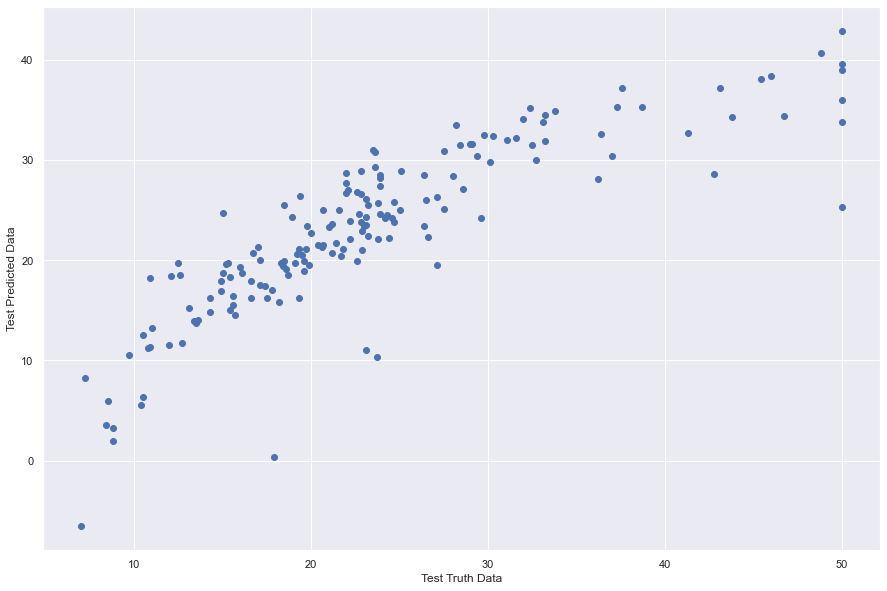

In [78]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [55]:
## residuals
residuals=y_test-reg_pred

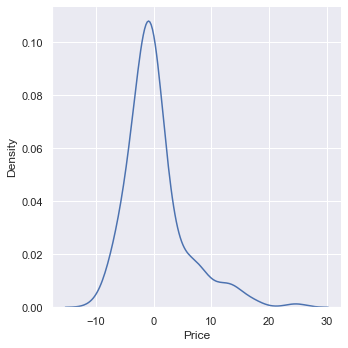

In [84]:
#sns.distplot(residuals, kde=True)
sns.displot(residuals,kind="kde")

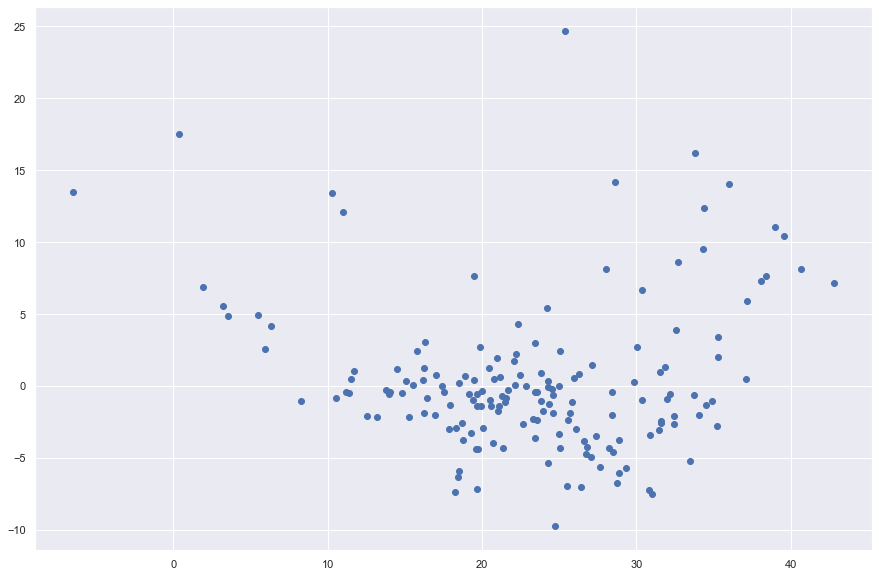

In [58]:
## Scatter plot with predictions and residuals
# uniform distribution
#homoscedacity
plt.scatter(reg_pred,residuals)

In [61]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

27.10099170996249
3.520658529879791
5.205861284164465


In [62]:
## R sq and 

In [63]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)

In [64]:
score

0.7165219393967555

In [71]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6924355682343882

## Ridge

In [72]:
## Ridge
from sklearn.linear_model import Ridge
ridge=Ridge()

In [73]:
ridge.fit(X_train,y_train)

Ridge()

In [75]:
ridge_pred=ridge.predict(X_test)

Text(0, 0.5, 'Test Predicted Data')

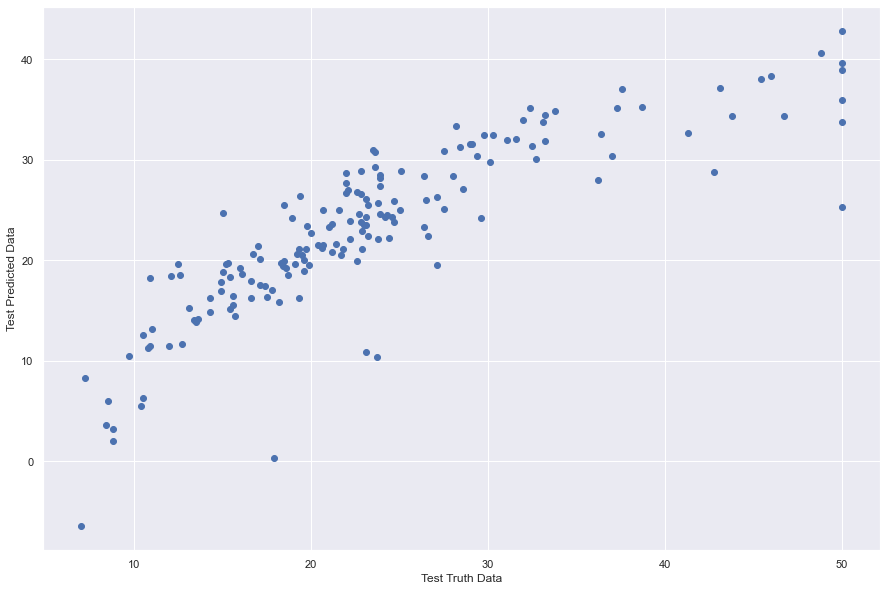

In [79]:
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [80]:
## residuals
ridge_residuals=y_test-ridge_pred

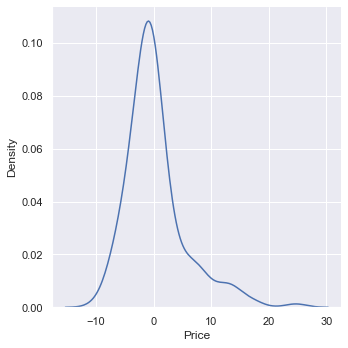

In [82]:
sns.displot(ridge_residuals,kind="kde")

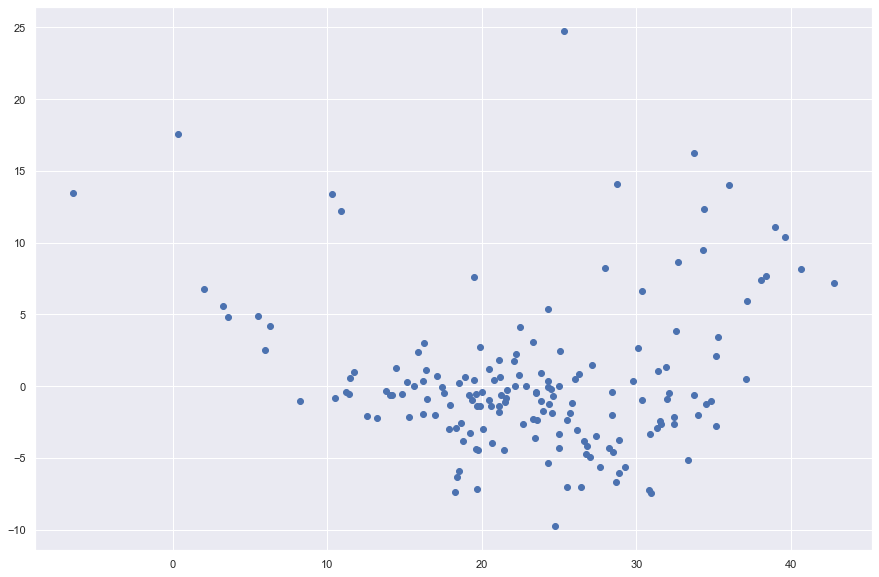

In [85]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(ridge_pred,ridge_residuals)

In [86]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

27.076490001440607
3.516104426348424
5.203507471066089


In [87]:
## R square and adjusted R square

In [88]:
from sklearn.metrics import r2_score
score=r2_score(y_test,ridge_pred)
print(score)

0.716778228793379


In [89]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6927136338542543

#Lasso

In [90]:
## Lasso
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)

In [91]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [92]:
lasso_pred=lasso.predict(X_test)

Text(0, 0.5, 'Test Predicted Data')

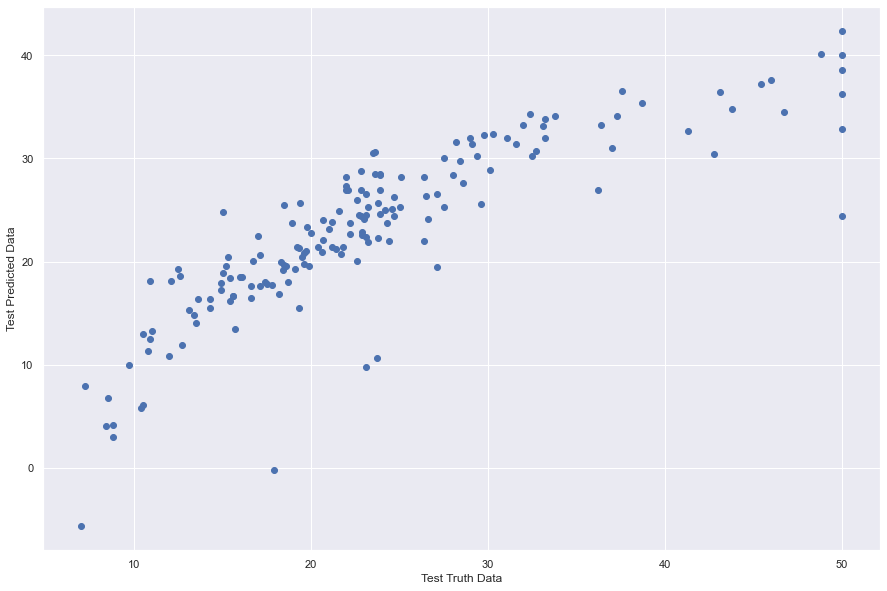

In [93]:
plt.scatter(y_test,lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [94]:
## residuals
lasso_residuals=y_test-lasso_pred

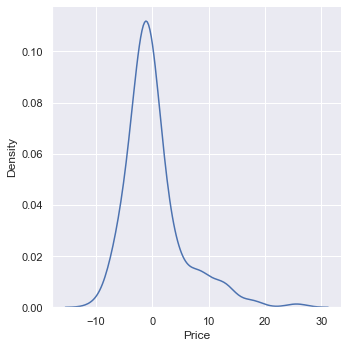

In [96]:
sns.displot(lasso_residuals,kind="kde")

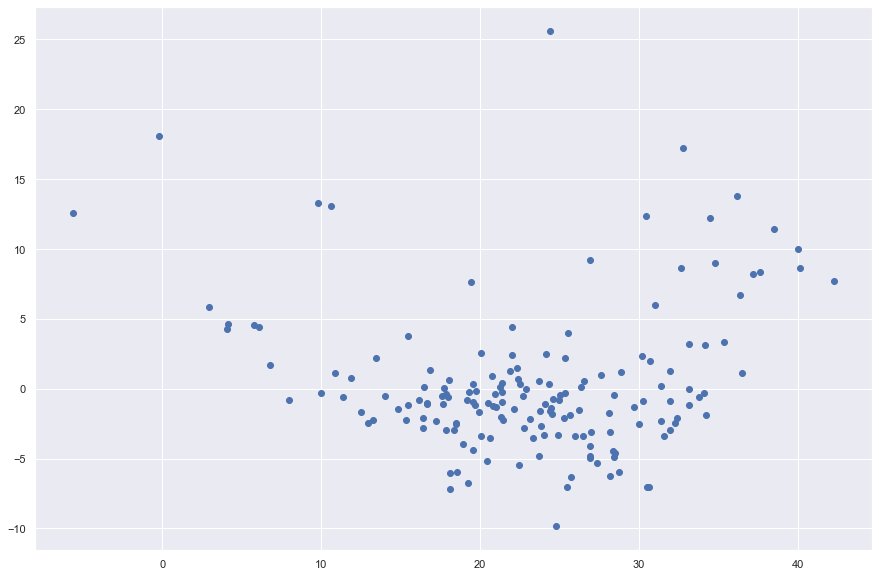

In [97]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(lasso_pred,lasso_residuals)

In [98]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

27.0005974365085
3.488825944431235
5.1962099107434545


In [99]:
## R square and adjusted R square

In [102]:
from sklearn.metrics import r2_score
score=r2_score(y_test,lasso_pred)
print(score)

0.7175720697476661


In [103]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.693574925347141

##ElasticNet

In [104]:
## ElasticNet
from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet()

In [105]:
elasticnet.fit(X_train,y_train)

ElasticNet()

In [106]:
elasticnet_pred=elasticnet.predict(X_test)

Text(0, 0.5, 'Test Predicted Data')

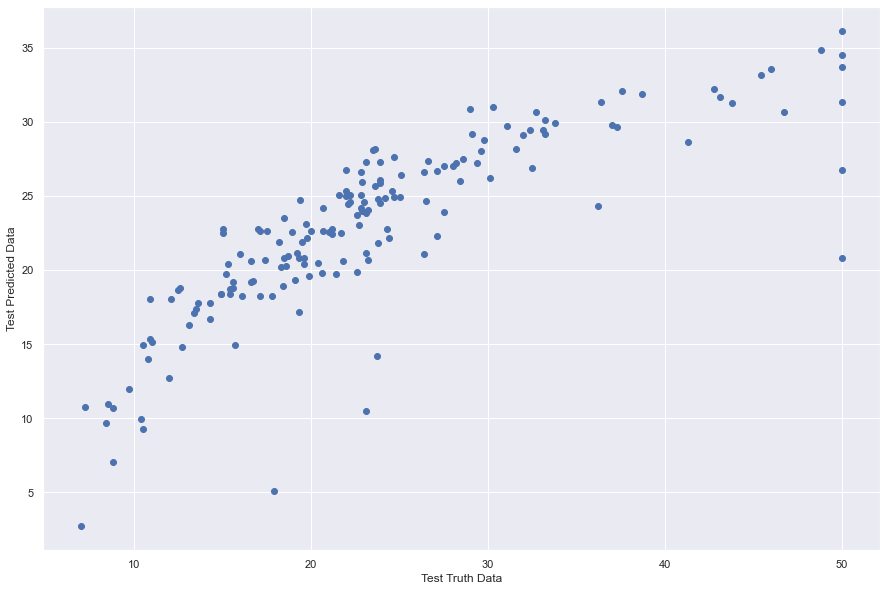

In [107]:
plt.scatter(y_test,elasticnet_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [108]:
## residuals
elasticnet_residuals=y_test-elasticnet_pred

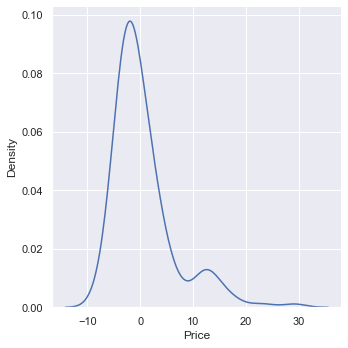

In [109]:
sns.displot(elasticnet_residuals,kind="kde")

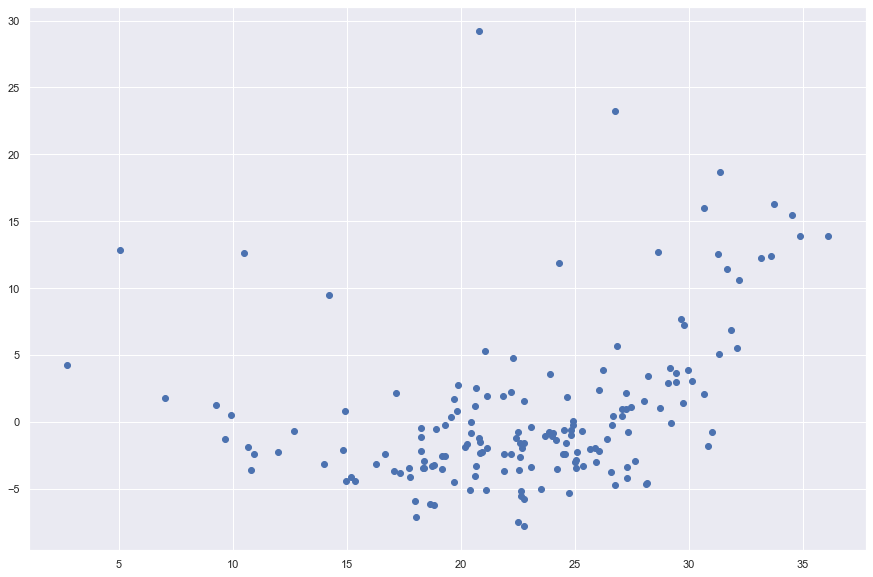

In [110]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(elasticnet_pred,elasticnet_residuals)

In [111]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elasticnet_pred))
print(mean_absolute_error(y_test,elasticnet_pred))
print(np.sqrt(mean_squared_error(y_test,elasticnet_pred)))

35.34154385393468
4.035696708769101
5.944875427957652


## R square and adjusted R square

In [113]:
from sklearn.metrics import r2_score
score=r2_score(y_test,elasticnet_pred)
print(score)

0.6303252509112041


In [114]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5989149781128096